# 🤖 Intro to Machine Learning Week 1
## Part 1 - Linear Regression
By Ellie Zhou, July 2025

Welcome to your first hands-on ML experience!

### What you'll learn in this notebook:
1. **Working with datasets** - How to work with pandas librar
2. **Linear Regression** - Predicting continuous values (house prices)
3. **Model Evaluation** - How to measure if your model is working well

### Instructions:
- Read each section carefully
- Run each code cell by clicking the ▶️ button or pressing Shift+Enter
- Don't worry if you don't understand all the Python code - focus on the concepts!
- Ask questions in Discord if you get stuck

---

## 📦 1. Setup - Importing Our Tools

First, we need to import the Python libraries we'll use. Think of these as importing different toolboxes:
- **pandas**: For working with data tables (like Excel)
- **numpy**: For mathematical operations
- **matplotlib & seaborn** : For creating graphs and visualizations
- **sklearn** : A widely used machine learning library which has a lot of models that you can work with


In [ ]:
# Import all the libraries we need
import pandas as pd                 # For data manipulation (like Excel on steroids!)
import numpy as np                  # For mathematical operations
import matplotlib.pyplot as plt     # For creating plots and graphs
import seaborn as sns              # For beautiful statistical visualizations

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # For splitting our data
from sklearn.linear_model import LinearRegression     # Linear regression model
from sklearn.linear_model import LogisticRegression   # Logistic regression model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler      # For scaling our data
from sklearn.metrics import confusion_matrix          # For confusion matrix

# Make our plots look nice
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("Ready to start our machine learning journey!")

All libraries imported successfully!
Ready to start our machine learning journey!


## 🏠 2. Linear Regression - Predicting House Prices

Let's start with **Linear Regression** - predicting continuous numbers (like house prices).

### The Problem:
We want to predict house prices based on:
- Size (square feet)
- Number of bedrooms
- Age of the house

### Step 1: Create Sample Data
In real life, you'd load data from a file. Here, we'll create realistic sample data.

In [3]:
# Set random seed for reproducible results
np.random.seed(42)

# Create sample house data (200 houses)
n_houses = 200

# Features (input variables)
house_size = np.random.normal(2000, 500, n_houses)        # Size in sq ft (average 2000, std 500)
bedrooms = np.random.randint(1, 6, n_houses)              # 1-5 bedrooms
house_age = np.random.randint(0, 50, n_houses)            # 0-50 years old

# Create realistic house prices based on our features
# Price formula: base_price + (size_effect) + (bedroom_effect) - (age_effect) + some_randomness
house_prices = (
    200000 +                           # Base price
    (house_size * 150) +               # $150 per sq ft
    (bedrooms * 25000) +               # $25,000 per bedroom
    (-house_age * 2000) +              # Lose $2,000 per year of age
    np.random.normal(0, 30000, n_houses)  # Random variation
)

# Make sure prices are positive
house_prices = np.maximum(house_prices, 100000)

# Create a DataFrame (like an Excel table)
house_data = pd.DataFrame({
    'Size_SqFt': house_size,
    'Bedrooms': bedrooms,
    'Age_Years': house_age,
    'Price': house_prices
})

print(f"Created dataset with {len(house_data)} houses")
print("\n ==== First 5 houses ====")
print(house_data.head())

print("\n ==== Dataset statistics ====")
print(house_data.describe().round(2))

Created dataset with 200 houses

 ==== First 5 houses ====
     Size_SqFt  Bedrooms  Age_Years          Price
0  2248.357077         2         24  539204.482477
1  1930.867849         2         20  486849.207255
2  2323.844269         1         35  541840.537817
3  2761.514928         1         22  592480.257411
4  1882.923313         1         15  505550.672505

 ==== Dataset statistics ====
       Size_SqFt  Bedrooms  Age_Years      Price
count     200.00    200.00     200.00     200.00
mean     1979.61      3.04      24.20  527362.92
std       465.50      1.46      14.59   85603.44
min       690.13      1.00       0.00  308723.89
25%      1647.44      2.00      11.75  466947.41
50%      1997.90      3.00      24.50  531649.40
75%      2250.43      4.00      36.25  587500.40
max      3360.08      5.00      49.00  784236.54


### Step 2: Explore Our Data
Before building a model, let's understand our data with visualizations!

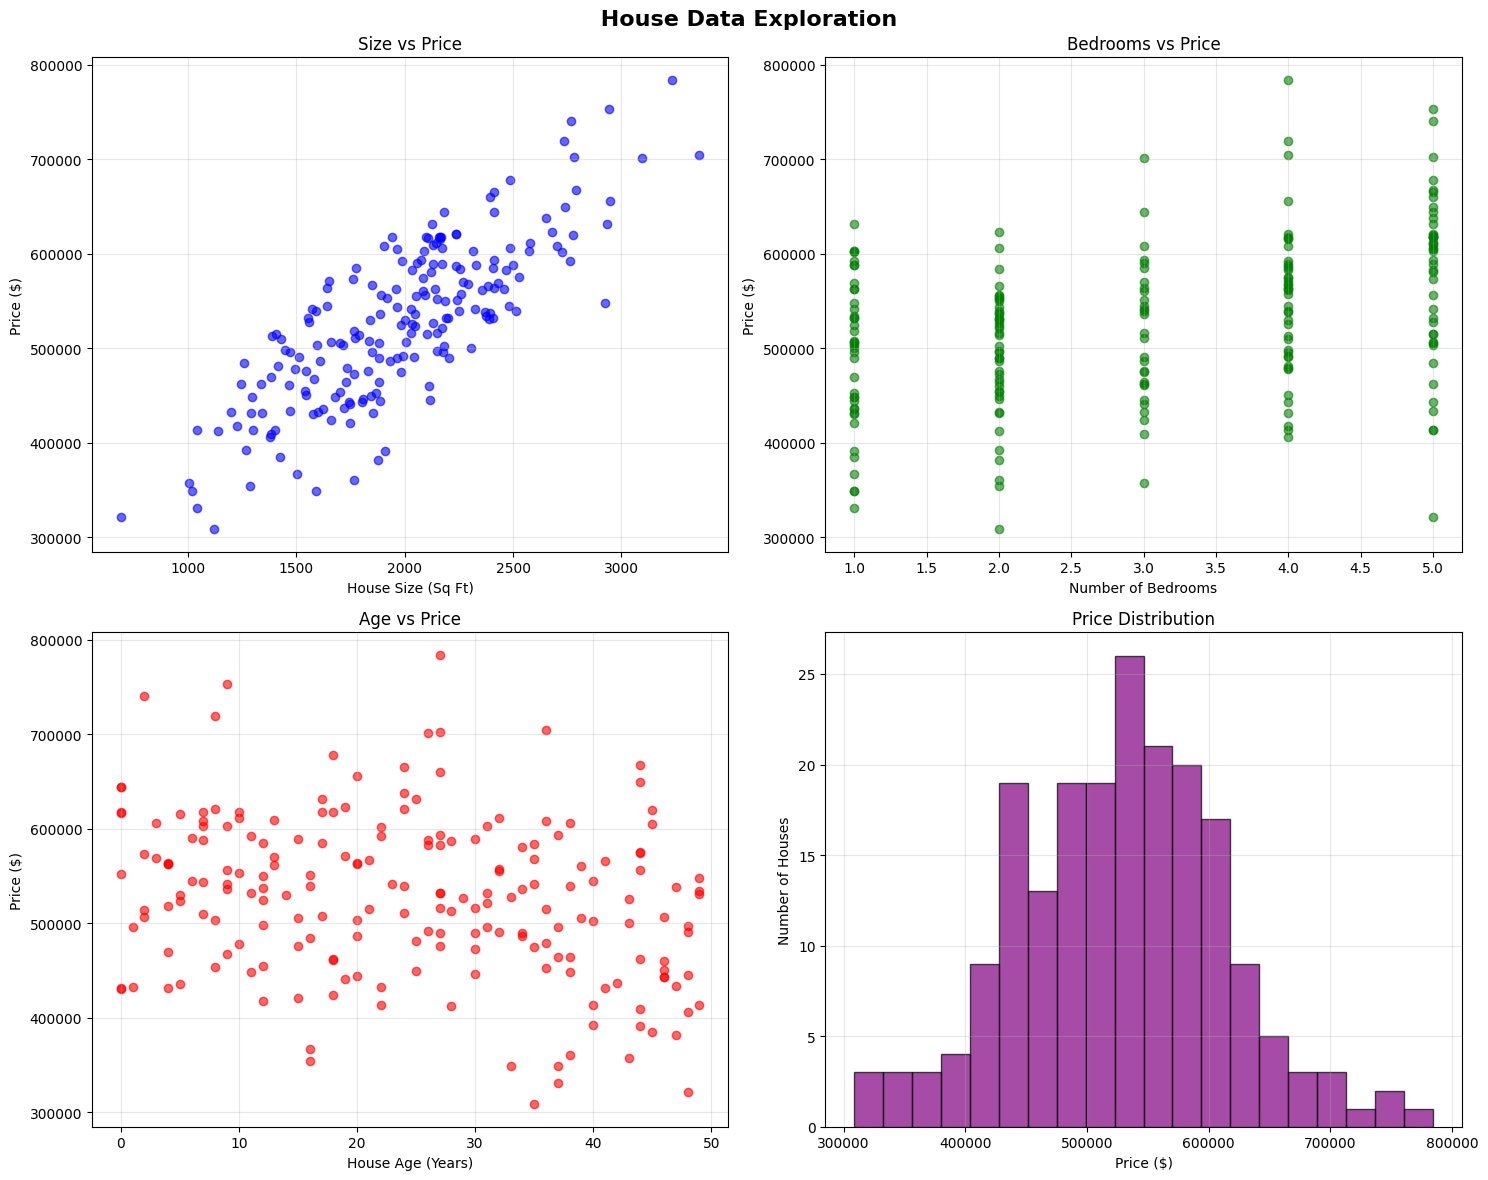

 ==== QUESTION: What do you notice? ====
• Larger houses tend to cost more
• More bedrooms generally mean higher prices
• Older houses tend to cost less
• Prices follow a roughly normal distribution


In [5]:
# Create visualizations to understand our data
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(' House Data Exploration', fontsize=16, fontweight='bold')

# Plot 1: House Size vs Price
axes[0,0].scatter(house_data['Size_SqFt'], house_data['Price'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('House Size (Sq Ft)')
axes[0,0].set_ylabel('Price ($)')
axes[0,0].set_title('Size vs Price')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Bedrooms vs Price
axes[0,1].scatter(house_data['Bedrooms'], house_data['Price'], alpha=0.6, color='green')
axes[0,1].set_xlabel('Number of Bedrooms')
axes[0,1].set_ylabel('Price ($)')
axes[0,1].set_title('Bedrooms vs Price')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Age vs Price
axes[1,0].scatter(house_data['Age_Years'], house_data['Price'], alpha=0.6, color='red')
axes[1,0].set_xlabel('House Age (Years)')
axes[1,0].set_ylabel('Price ($)')
axes[1,0].set_title('Age vs Price')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Price distribution
axes[1,1].hist(house_data['Price'], bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_xlabel('Price ($)')
axes[1,1].set_ylabel('Number of Houses')
axes[1,1].set_title('Price Distribution')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" ==== QUESTION: What do you notice? ====")
print("• Larger houses tend to cost more")
print("• More bedrooms generally mean higher prices")
print("• Older houses tend to cost less")
print("• Prices follow a roughly normal distribution")

### Step 3: Build Our Linear Regression Model

Now let's teach the computer to predict house prices!

**Remember from class:**
- **Features (X)**: What we know (size, bedrooms, age)
- **Labels (y)**: What we want to predict (price)
- **Training**: Teaching the model with known examples
- **Testing**: Checking how well it works on unseen data

In [6]:
# Step 1: Separate Features (X) and Labels (y)
# Features: what we use to make predictions
X_house = house_data[['Size_SqFt', 'Bedrooms', 'Age_Years']]
# Labels: what we want to predict
y_house = house_data['Price']

print(" Features (X) - what we know about each house:")
print(X_house.head())
print("\n Labels (y) - what we want to predict:")
print(y_house.head())

# Step 2: Split data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_house, y_house,
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducible results
)

print(f"\n ==== Data split ====")
print(f"• Training set: {len(X_train)} houses")
print(f"• Testing set: {len(X_test)} houses")

# Step 3: Create and train the model
print("\n Creating Linear Regression model... ")
linear_model = LinearRegression()

print(" Training the model on training data...")
linear_model.fit(X_train, y_train)

print(" Model training complete!")

# Step 4: Make predictions on test data
print(" Making predictions on unseen test data...")
y_pred = linear_model.predict(X_test)

print(" Predictions complete!")

 Features (X) - what we know about each house:
     Size_SqFt  Bedrooms  Age_Years
0  2248.357077         2         24
1  1930.867849         2         20
2  2323.844269         1         35
3  2761.514928         1         22
4  1882.923313         1         15

 Labels (y) - what we want to predict:
0    539204.482477
1    486849.207255
2    541840.537817
3    592480.257411
4    505550.672505
Name: Price, dtype: float64

 ==== Data split ====
• Training set: 160 houses
• Testing set: 40 houses

 Creating Linear Regression model... 
 Training the model on training data...
 Model training complete!
 Making predictions on unseen test data...
 Predictions complete!


### Step 4: Evaluate Our Linear Regression Model

How well did our model do? Let's check!

In [8]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" ==== Model Performance ====")
print(f"• Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"• R² Score: {r2:.3f}")
print("\n ==== What does this mean? ====")
print(f"• On average, our predictions are off by ${rmse:,.0f}")
print(f"• Our model explains {r2*100:.1f}% of the price variation")
print(f"• R² closer to 1.0 = better model (1.0 = perfect predictions)")

# Show what the model learned
print("\n ==== What the model learned ====")
feature_names = ['Size_SqFt', 'Bedrooms', 'Age_Years']
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print(f"Base price (intercept): ${intercept:,.2f}")
for feature, coef in zip(feature_names, coefficients):
    print(f"• {feature}: ${coef:.2f} per unit")

print("\n ==== Model equation =====")
print(f"Price = ${intercept:.0f} + (${coefficients[0]:.2f} × Size) + (${coefficients[1]:.0f} × Bedrooms) + (${coefficients[2]:.0f} × Age)")

 ==== Model Performance ====
• Root Mean Squared Error (RMSE): $22,676.89
• R² Score: 0.892

 ==== What does this mean? ====
• On average, our predictions are off by $22,677
• Our model explains 89.2% of the price variation
• R² closer to 1.0 = better model (1.0 = perfect predictions)

 ==== What the model learned ====
Base price (intercept): $210,402.62
• Size_SqFt: $146.93 per unit
• Bedrooms: $22559.66 per unit
• Age_Years: $-1773.10 per unit

 ==== Model equation =====
Price = $210403 + ($146.93 × Size) + ($22560 × Bedrooms) + ($-1773 × Age)


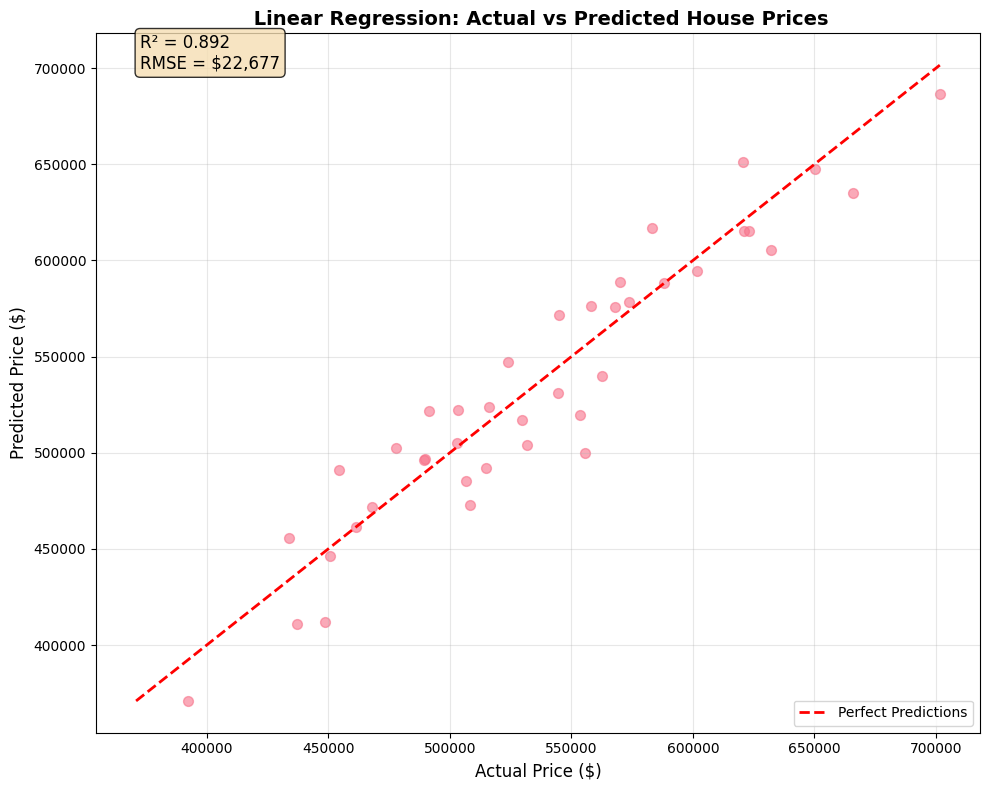

 ==== How to read this plot ====
• Points close to the red line = good predictions
• Points far from the red line = poor predictions
• The closer all points are to the line, the better our model!


In [9]:
# Visualize our predictions vs actual prices
plt.figure(figsize=(10, 8))

# Scatter plot: actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.6, s=50)

# Perfect prediction line (if predictions were perfect)
min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], 'r--', lw=2, label='Perfect Predictions')

plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.title(' Linear Regression: Actual vs Predicted House Prices', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add performance text
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nRMSE = ${rmse:,.0f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print(" ==== How to read this plot ====")
print("• Points close to the red line = good predictions")
print("• Points far from the red line = poor predictions")
print("• The closer all points are to the line, the better our model!")

### Step 5: Make Predictions on New Houses

Let's use our trained model to predict prices for new houses!

In [11]:
# Create some new houses to predict
new_houses = pd.DataFrame({
    'Size_SqFt': [1500, 2500, 3000, 1200, 2200],
    'Bedrooms': [2, 4, 5, 1, 3],
    'Age_Years': [5, 15, 30, 2, 10]
})

# Make predictions
new_predictions = linear_model.predict(new_houses)

print(" ==== Predicting prices for new houses ==== ")
print("=" * 60)

for i, (idx, house) in enumerate(new_houses.iterrows()):
    print(f"House {i+1}:")
    print(f"  Size: {house['Size_SqFt']:,.0f} sq ft")
    print(f"  Bedrooms: {house['Bedrooms']}")
    print(f"  Age: {house['Age_Years']} years")
    print(f"  Predicted Price: ${new_predictions[i]:,.2f}")
    print("-" * 40)

print("\n Try it yourself! ")
print("Change the values in the new_houses DataFrame above and re-run this cell!")

 ==== Predicting prices for new houses ==== 
House 1:
  Size: 1,500 sq ft
  Bedrooms: 2
  Age: 5 years
  Predicted Price: $467,048.78
----------------------------------------
House 2:
  Size: 2,500 sq ft
  Bedrooms: 4
  Age: 15 years
  Predicted Price: $641,365.32
----------------------------------------
House 3:
  Size: 3,000 sq ft
  Bedrooms: 5
  Age: 30 years
  Predicted Price: $710,792.58
----------------------------------------
House 4:
  Size: 1,200 sq ft
  Bedrooms: 1
  Age: 2 years
  Predicted Price: $405,729.96
----------------------------------------
House 5:
  Size: 2,200 sq ft
  Bedrooms: 3
  Age: 10 years
  Predicted Price: $583,592.70
----------------------------------------

 Try it yourself! 
Change the values in the new_houses DataFrame above and re-run this cell!


---

## Summary:

Great job completing the Linear Regression section! 🎉

### What we've learned so far:
✅ How to create and explore datasets  
✅ Linear regression for predicting continuous values  
✅ Train/test split methodology  
✅ Model evaluation with RMSE and R²  
✅ Making predictions on new data  